In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
x, y = mnist['data'], mnist['target']

In [6]:
x.shape

(70000, 784)

In [7]:
y.shape

(70000,)

1. We know that mnist dataset is a set of handwritten numbers and we are using the pixels to decide which number is which. Here we are basically checking how the letters look like, we take the first letter and then convert it into a numpy array because the features are 28 x 28, so we reshape the given 784 features into 28 x 28 and then we display it using matplotlib

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
some_digit = x[0:1].to_numpy()
some_target = y[0]

In [10]:
some_digit_image = some_digit.reshape(28, 28)

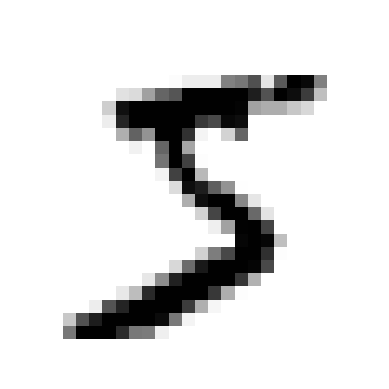

In [11]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [12]:
some_target

'5'

In [13]:
y = y.astype(int) # converting the targets to integer tyep because they are in string

In [14]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

### Training a binary classifier 
1. We are training a binary classifier which can identify just the number 5 

In [15]:
y_train_5 = (y_train==5) # will return true for all values which are 5
y_test_5 = (y_test==5)

In [16]:
# we will start with schoastic gradient descent classifier 
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

SGDClassifier()

In [17]:
sgd_clf.predict(some_digit)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

2. we can see that the classifier is prediciting 5 correctly

### Perfromance measures
1. Evaluating a classifier is trickier than evaluating a regressor so we will be focusing on that in this section.

#### Measuring accuracy using cross validation 
1. In the starting we will use cross validation to check how well our model is performing 

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.9674 , 0.96215, 0.90885])

2. We can see that the accuray is very high but before going further lets take a look at a very dumb classifier which classfies every non 5 number. 

In [20]:
import numpy as np 
from sklearn.base import BaseEstimator

In [21]:
class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)

In [22]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

3. In this too we are getting 90 percent accuracy, this is happening because there are only 10% 5 pictures, meaning that we can be wrong at least 10% of the time, so we will be right the other 90% of the time

4. We are going to use confusion matrix since CV cannot provide a good way to measure the accuracy of the model

In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

5. Cross val predict will provide us with clean predictions, which means the model predicts during cross validation which is basically same as saying that the model hasnt seen the training data as of yet.


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_pred, y_train_5)

array([[53556,  1106],
       [ 1023,  4315]], dtype=int64)

6. We will use recall and precision now for accuracy 

In [25]:
from sklearn.metrics import precision_score, recall_score


In [26]:
precision_score(y_train_pred, y_train_5)

0.7959786017339974

In [27]:
recall_score(y_train_pred, y_train_5)

0.8083551892094417

In [28]:
# using f1 score 
from sklearn.metrics import f1_score
f1_score(y_train_pred, y_train_5)

0.8021191560553954

7. There is a precision and recall tradeoff, and scikit learn doesn't let us set the threshold value for the classifier manually but it does allow us access to the scores which are used in classification and using those we can make predictions depending on any threshold we want

In [29]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method='decision_function')

In [30]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [31]:
# creating a function to plot precision and recall against threshold values 
def plot_precision_recall_vs_threshold(precisions, recall, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')

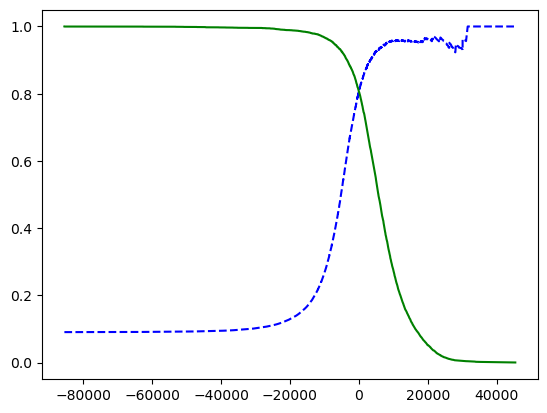

In [32]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [34]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0, 1], 'k--')

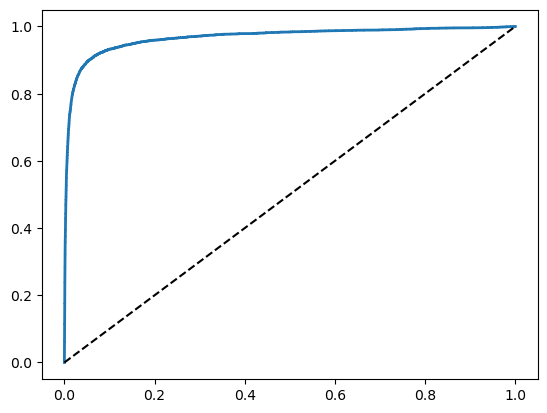

In [35]:
plot_roc_curve(fpr, tpr)
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9673618516532643

8. This marks the end of performance metrics and binary classification, we will now move on to multiclass classification in the next section

### Mutliclass classification

1. Scikit learn runs OVA (one versus all) in all of its binary classifiers except in SVM (in SVM, due to the fact that it cant handle large datasets that well and is more prone to increasing dimensionality we use OVO, one versus one). We will use the complete training set to train the sdg_clf

In [37]:
sgd_clf.fit(x_train, y_train)

SGDClassifier()

In [38]:
sgd_clf.predict(some_digit)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3])

In [39]:
some_digit_scores = sgd_clf.decision_function(some_digit)
some_digit_scores

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-14819.02765572, -25384.73390715, -13624.80313723,
          2855.16410052, -23532.31323187,    499.16565047,
        -26329.45030884, -23185.36610976,  -9736.52178027,
        -12014.27884059]])

2. If we want to force the scikit learn to use OVO strategy we can use an instance of the OneVsOne classifier as follows

In [40]:
from sklearn.multiclass import OneVsOneClassifier

In [41]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [42]:
ovo_clf.fit(x_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [43]:
ovo_clf.predict(some_digit)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5])

In [44]:
#cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring='accuracy')

array([0.8649 , 0.87645, 0.87285])

3. This accuracy score isnt so bad but we can do much better, we can scale the data and that will lead to a much better accuracy score. 

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
#scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

In [ ]:
#cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring='accuracy')

### Error analysis 

1. We are done through the steps of data exploration, choosing models to train our data on and shortlisting some promising ones, next we will move on to fine tuning our models. 

2. This can be done by taking our pomising model and see where are we making a mistake. 

In [ ]:
#y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)
#conf_mx = confusion_matrix(y_train, y_train_pred)
#conf_mx

In [ ]:
# plt.matshow(conf_mx, cmap=plt.cm.gray)

In [ ]:
# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx/row_sums

In [ ]:
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

3. Here we can see that the 8 line is pretty close to white, it implies that the model is making an error in prediciting the number 8, so now we can do something to correct this error, maybe we can write an alogrithm which identifies the number of closed loops, which can help us predict the number 8 

### Multilabel classification

1. Classification systems which can output multiple binary tags is called a multilabel classification system

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# y_train_large = (y_train>=7)
# y_train_odd = (y_train % 2==1)
# y_multilabel = np.c_[y_train_large, y_train_odd]

In [ ]:
# knn_clf = KNeighborsClassifier()
# knn_clf.fit(x_train, y_multilabel)

In [ ]:
# knn_clf.predict(some_digit)

2. The above code creates y labels such that it can tell if a number is bigger than 7 and if its odd or not, we get the correct answer, that its not greater than 7 and yes it is odd

## Exercises

Note: These are exercies so i'll be creating new models and basically new everything here

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knn_clf = KNeighborsClassifier()

In [6]:
x, y = mnist['data'], mnist['target']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)

In [9]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [10]:
from sklearn.metrics import accuracy_score
y_train_pred = knn_clf.predict(x_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [11]:
train_score = accuracy_score(y_train_pred, y_train)
train_score

0.9818730158730159

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
# param_grid = [{'weights':["uniform", "distance"], 'n_neighbors': [3, 4, 5] }]
# clf = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
# clf.fit(x_train, y_train)

In [14]:
# clf.best_params_

In [15]:
# clf.best_score_

We are having the highest accuracy of 97% after going through a search for the best hyperparams

2. This is the second problem 

In [16]:
from scipy.ndimage.interpolation import shift

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_49176\987197595.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [17]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dx, dy], cval=0, mode='constant')
    return shifted_image.reshape([-1])

In [19]:
image = x_train[1000:1001]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)


AttributeError: 'DataFrame' object has no attribute 'reshape'

In [23]:
x_train_augmented = [image for image in x]
y_train_augmented = [label for label in y]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(x, y):
        x_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmenetd.append(label)
x_train_augmented = np.array(x_train_augmented)
y_train_augmented = np.array(y_train_augmented)


AttributeError: 'str' object has no attribute 'reshape'

In [22]:
import numpy as np 
shuffle_idx = np.random.permutation(len(x_train_augmented))
x_train_augmented = x_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

TypeError: only integer scalar arrays can be converted to a scalar index